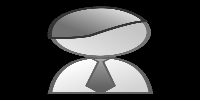

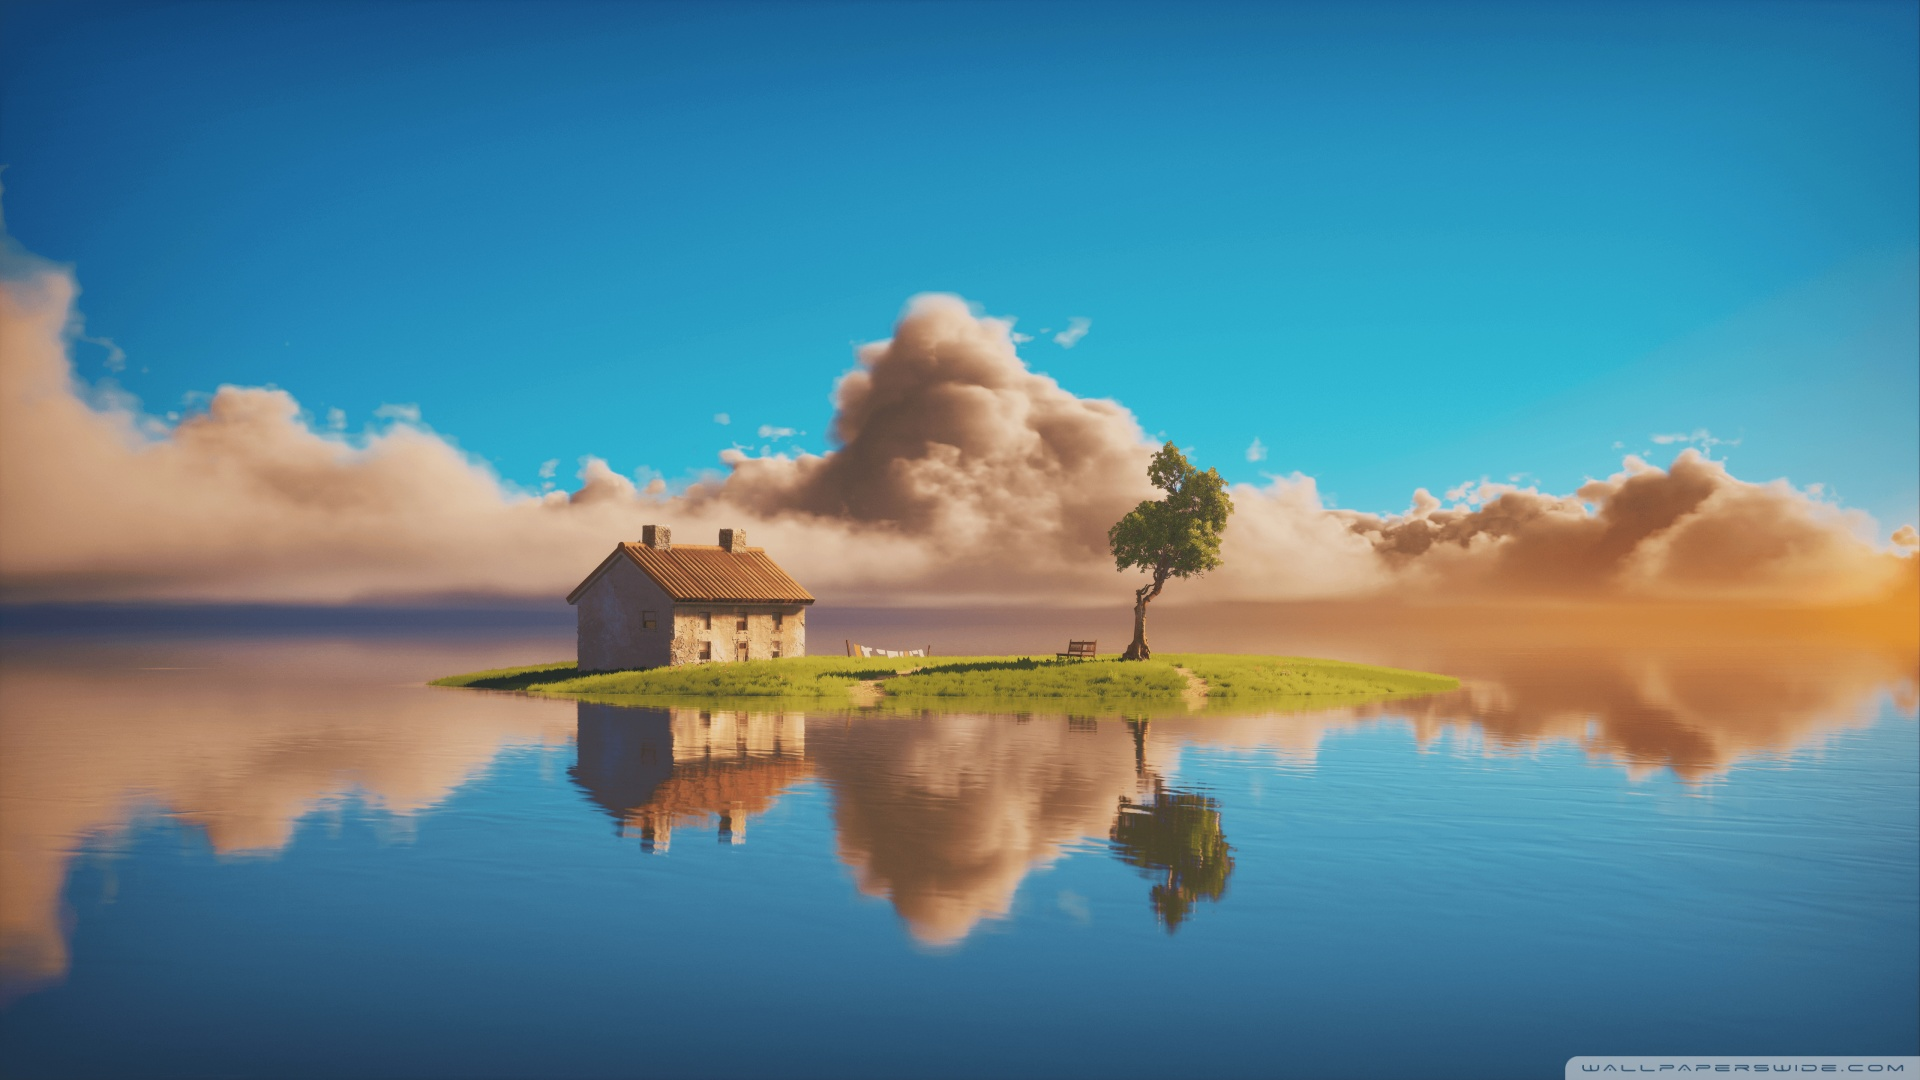

In [96]:
# Python program to demonstrate
# image steganography using OpenCV


import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow


pic1 = cv2.imread('/content/Crystal_personal.svg.png', 0)
pic1 = cv2.resize(pic1,(200,100))
cv2_imshow(pic1)

pic2 = cv2.imread('/content/house_island_2-wallpaper-1920x1080.jpg')
cv2_imshow(pic2)

# Encryption


In [97]:
flattened_pic1 = pic1.flatten()

binary_string_pic1 = "".join(format(pixel, "08b") for pixel in flattened_pic1)

print(len(binary_string_pic1))

binary_string_pic1_array = np.array(list(binary_string_pic1), dtype=int)

binary_string_pic1_array

160000


array([0, 0, 0, ..., 0, 0, 0])

In [98]:
flattened_pic1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [99]:
flattened_pic2 = pic2.reshape((-1, 3))

np.random.seed(42)
random_indices = np.random.choice(flattened_pic2.shape[0], size=160000, replace=False)
random_pixels = flattened_pic2[random_indices]

print(random_indices)
print(random_pixels)
pic2

[ 211669 1302472 2036543 ... 1347069  594857  753302]
[[164 112  29]
 [ 43 115 127]
 [115  83  42]
 ...
 [ 40 119 138]
 [204 173  44]
 [202 168  44]]


array([[[107,  65,  23],
        [107,  65,  23],
        [107,  65,  23],
        ...,
        [140,  89,  27],
        [136,  88,  30],
        [122,  75,  19]],

       [[106,  64,  22],
        [106,  64,  22],
        [106,  64,  22],
        ...,
        [144,  93,  31],
        [139,  91,  33],
        [124,  77,  21]],

       [[106,  64,  22],
        [106,  64,  22],
        [106,  64,  22],
        ...,
        [146,  95,  32],
        [139,  92,  31],
        [124,  78,  20]],

       ...,

       [[ 69,  52,  33],
        [ 69,  52,  33],
        [ 69,  52,  33],
        ...,
        [177, 165, 153],
        [174, 165, 152],
        [171, 162, 149]],

       [[ 69,  52,  33],
        [ 69,  52,  33],
        [ 69,  52,  33],
        ...,
        [177, 165, 153],
        [174, 165, 152],
        [170, 161, 148]],

       [[ 68,  51,  32],
        [ 69,  52,  33],
        [ 69,  52,  33],
        ...,
        [176, 164, 152],
        [173, 164, 151],
        [170, 161, 148]]

In [100]:
blue = random_pixels[:,0]
green = random_pixels[:,1]
red = random_pixels[:,2]
print(blue)
print(green)
print(red)

[164  43 115 ...  40 204 202]
[112 115  83 ... 119 173 168]
[ 29 127  42 ... 138  44  44]


In [101]:
blue1 = np.array([], dtype = int)

for i, j in zip(blue, binary_string_pic1_array):
    if i%2 != j:
      i += 1
      blue1 = np.append(blue1,i)
    else:
      blue1 = np.append(blue1,i)

green1 = np.array([], dtype = int)

for i, j in zip(green, binary_string_pic1_array):
    if i%2 != j:
      i += 1
      green1 = np.append(green1,i)
    else:
      green1 = np.append(green1,i)

red1 = np.array([], dtype = int)

for i, j in zip(red, binary_string_pic1_array):
    if i%2 != j:
      i += 1
      red1 = np.append(red1,i)
    else:
      red1 = np.append(red1,i)

print(blue1)
print(green1)
print(red1)

[164  44 116 ...  40 204 202]
[112 116  84 ... 120 174 168]
[ 30 128  42 ... 138  44  44]


In [102]:
pic1_in_pic2 = np.concatenate((blue1[:, np.newaxis], green1[:, np.newaxis], red1[:, np.newaxis]), axis=1)
pic1_in_pic2

array([[164, 112,  30],
       [ 44, 116, 128],
       [116,  84,  42],
       ...,
       [ 40, 120, 138],
       [204, 174,  44],
       [202, 168,  44]])

In [103]:
j = 0
for i in random_indices:
  flattened_pic2[i] = pic1_in_pic2[j]
  j += 1
encrypt_pic = flattened_pic2.reshape((1080,1920,3))
flattened_pic2[2036543]

array([116,  84,  42], dtype=uint8)

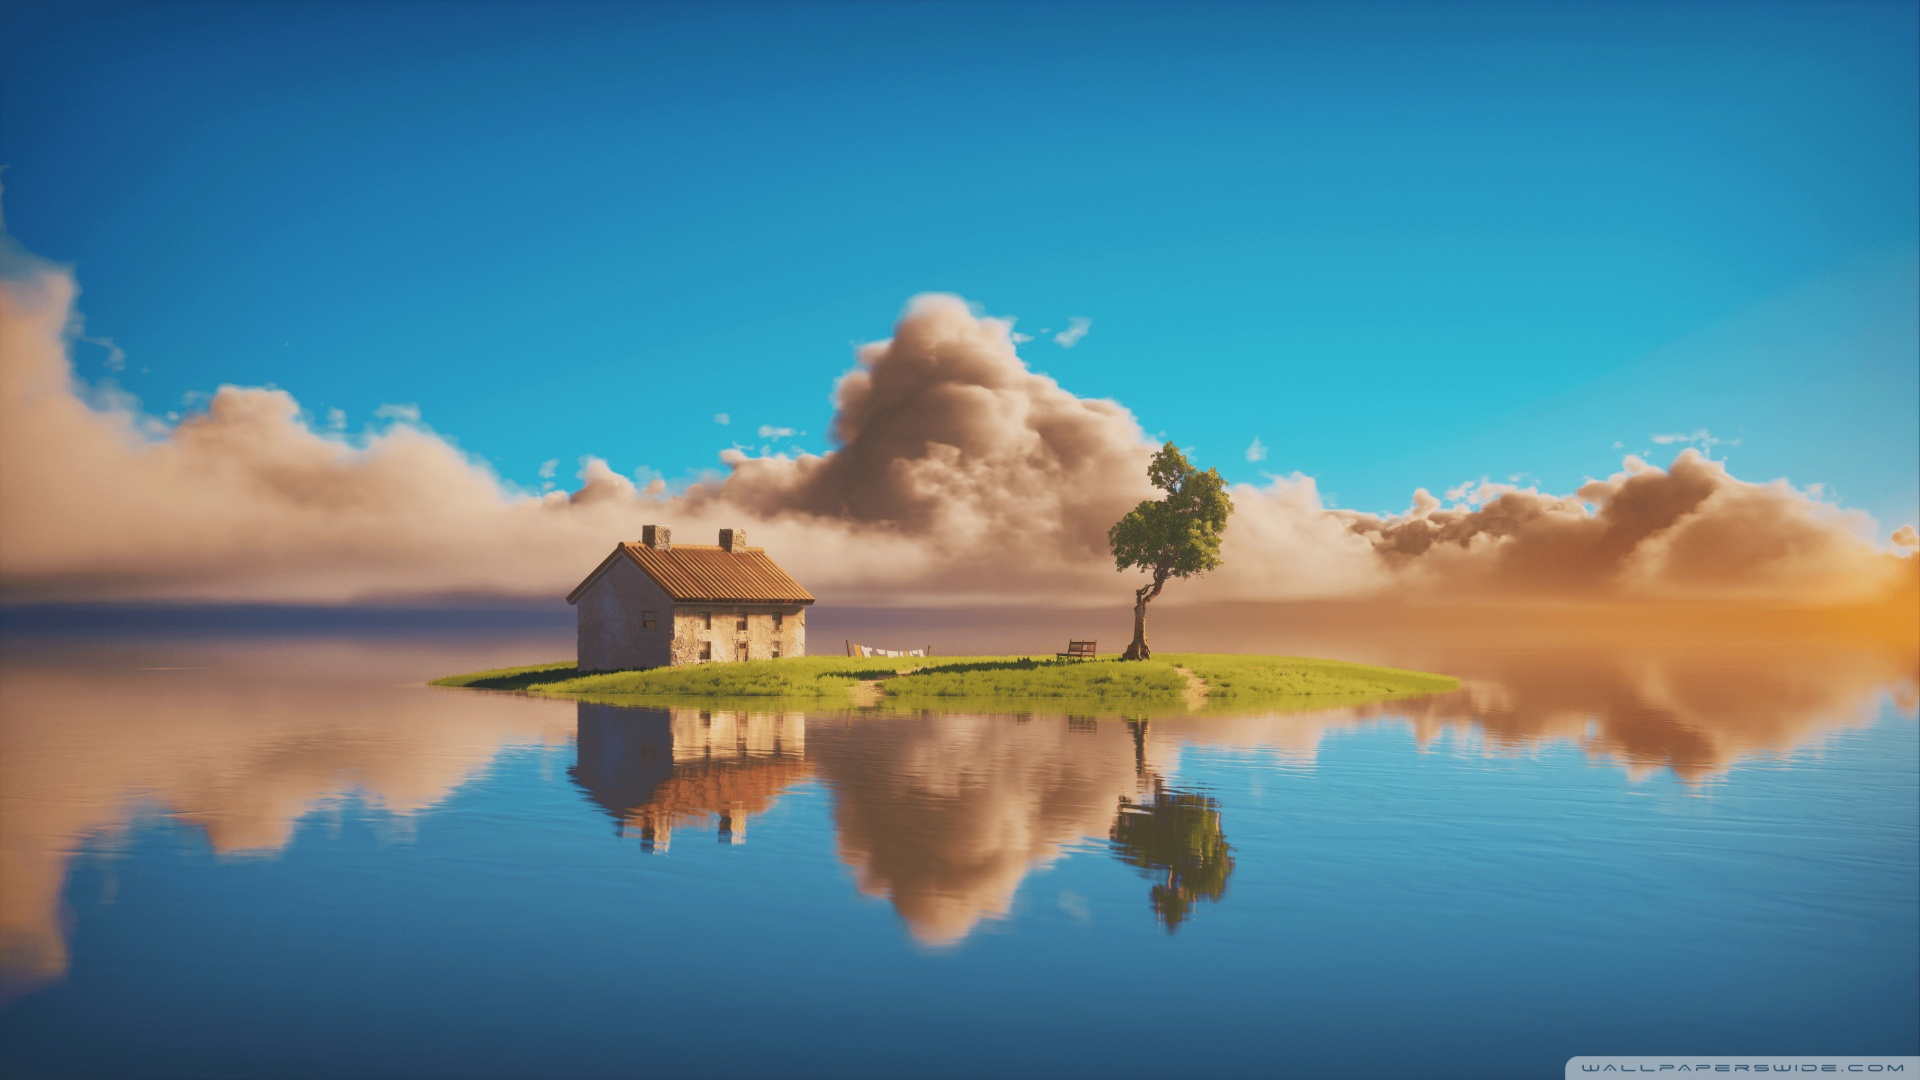

In [104]:
cv2_imshow(encrypt_pic)

# Decryption

In [105]:
flattened_encrypt = encrypt_pic.reshape((-1, 3))

np.random.seed(42)
random_indices_en = np.random.choice(flattened_encrypt.shape[0], size=160000, replace=False)
random_pixels_en = flattened_encrypt[random_indices]

print(random_indices_en)
print(random_pixels_en)

[ 211669 1302472 2036543 ... 1347069  594857  753302]
[[164 112  30]
 [ 44 116 128]
 [116  84  42]
 ...
 [ 40 120 138]
 [204 174  44]
 [202 168  44]]


In [113]:
blue = random_pixels_en[:,0]
green = random_pixels_en[:,1]
red = random_pixels_en[:,2]
print(blue)
print(green)
print(red)

[164  44 116 ...  40 204 202]
[112 116  84 ... 120 174 168]
[ 30 128  42 ... 138  44  44]


In [114]:
blue1 = np.array([], dtype = str)

for i in blue:
    j=i%2
    blue1 = np.append(blue1,j)

print(blue1)


['0' '0' '0' ... '0' '0' '0']


In [115]:
blue1.shape

(160000,)

In [116]:
string = ''.join(blue1)
string

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [117]:
decimal_numbers = [int(binary,2) for binary in [string[i:i+8] for i in range(0, len(string), 8)]]
print(decimal_numbers)
type(decimal_numbers)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

list

In [118]:
flatten_decrypt = np.array(decimal_numbers)
flatten_decrypt

array([0, 0, 0, ..., 0, 0, 0])

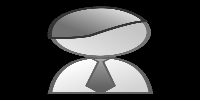

In [119]:
decrypt_pic = flatten_decrypt.reshape((100,200))
cv2_imshow(decrypt_pic)